In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the dataset
file_path = "2023 June Unemployment Rate by County.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

In [8]:
# Display first 5 rows
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,Series ID,Region Name,Region Code,1/6/2023
0,ALAUTA1URN,"Autauga County, AL",1001,2.3
1,ALBALD0URN,"Baldwin County, AL",1003,2.3
2,ALBARB5URN,"Barbour County, AL",1005,5.0
3,ALBIBB7URN,"Bibb County, AL",1007,2.9
4,ALBLOU9URN,"Blount County, AL",1009,2.3


In [10]:
# Display last 5 rows
print("\nLast 5 rows of the dataset:")
data.tail()


Last 5 rows of the dataset:


,Series ID,Region Name,Region Code,1/6/2023
3139,WYSWEE7URN,"Sweetwater County, WY",56037,3.6
3140,WYTETO9URN,"Teton County, WY",56039,1.7
3141,WYUINT1URN,"Uinta County, WY",56041,3.4
3142,WYWASH3URN,"Washakie County, WY",56043,3.4
3143,WYWEST5URN,"Weston County, WY",56045,2.2


In [12]:
# Dataset summary
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Series ID    3144 non-null   object 
 1   Region Name  3144 non-null   object 
 2   Region Code  3144 non-null   int64  
 3   1/6/2023     3139 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 98.4+ KB
None


In [14]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(data.isnull().sum())


Missing Values in Dataset:
Series ID      0
Region Name    0
Region Code    0
1/6/2023       5
dtype: int64


In [16]:
# Drop rows with missing values (if needed)
data = data.dropna()

In [18]:
# Rename columns 
data.rename(columns={'1/6/2023': 'Unemployment Rate'}, inplace=True)

In [20]:
# Ensure data types are correct
data['Unemployment Rate'] = pd.to_numeric(data['Unemployment Rate'], errors='coerce')

C:\Users\sagar.kumar\AppData\Local\Temp\ipykernel_19168\3959813854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Unemployment Rate', y='Region Name', data=top_10, palette='viridis')


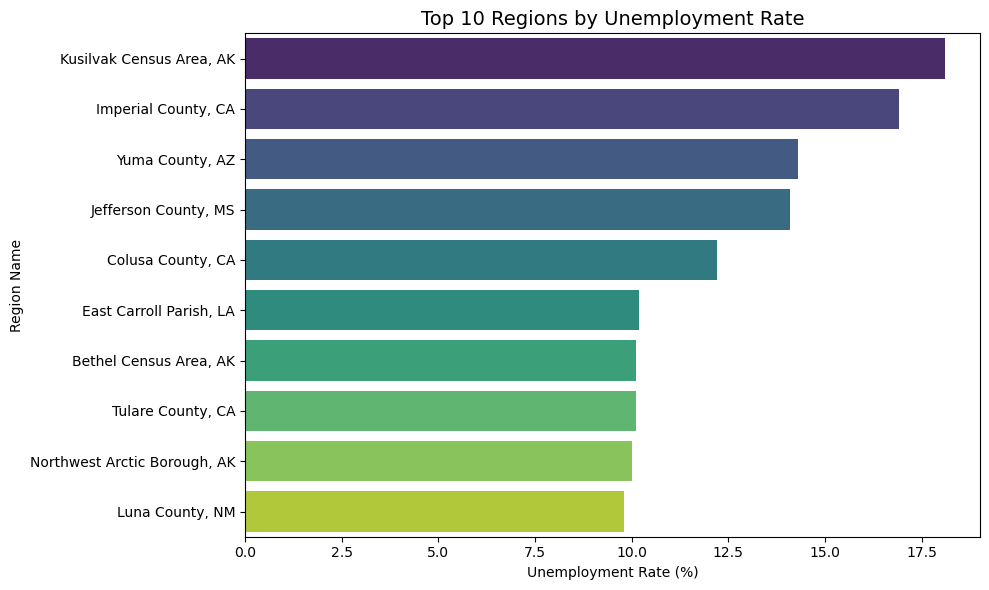

In [22]:
# Bar Chart: Top 10 Regions by Unemployment Rate --------
top_10 = data.nlargest(10, 'Unemployment Rate')
plt.figure(figsize=(10, 6))
sns.barplot(x='Unemployment Rate', y='Region Name', data=top_10, palette='viridis')
plt.title('Top 10 Regions by Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region Name')
plt.tight_layout()
plt.show()

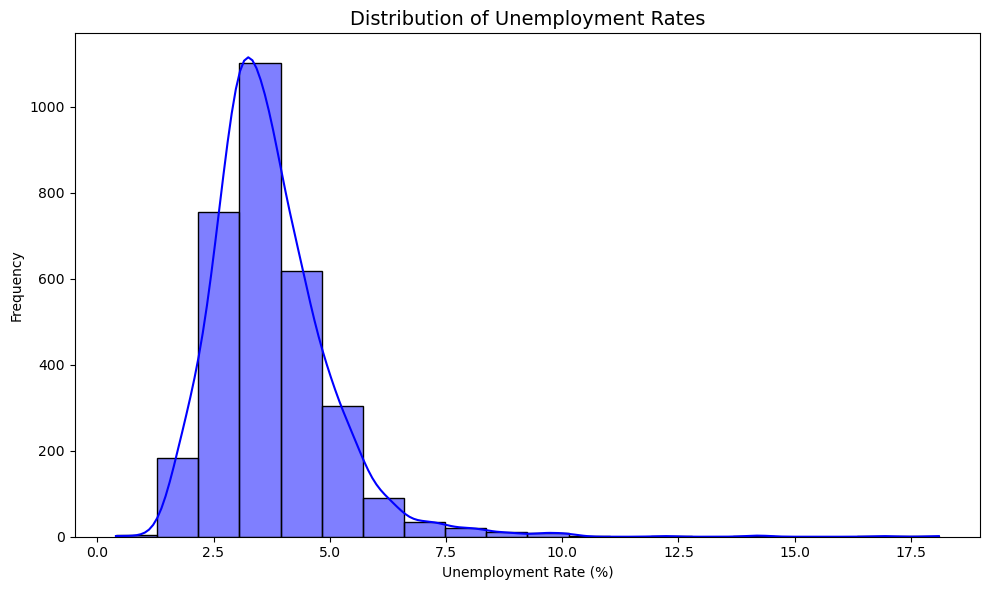

In [26]:
 # Histogram: Distribution of Unemployment Rates --------
plt.figure(figsize=(10, 6))
sns.histplot(data['Unemployment Rate'], bins=20, kde=True, color='blue')
plt.title('Distribution of Unemployment Rates', fontsize=14)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

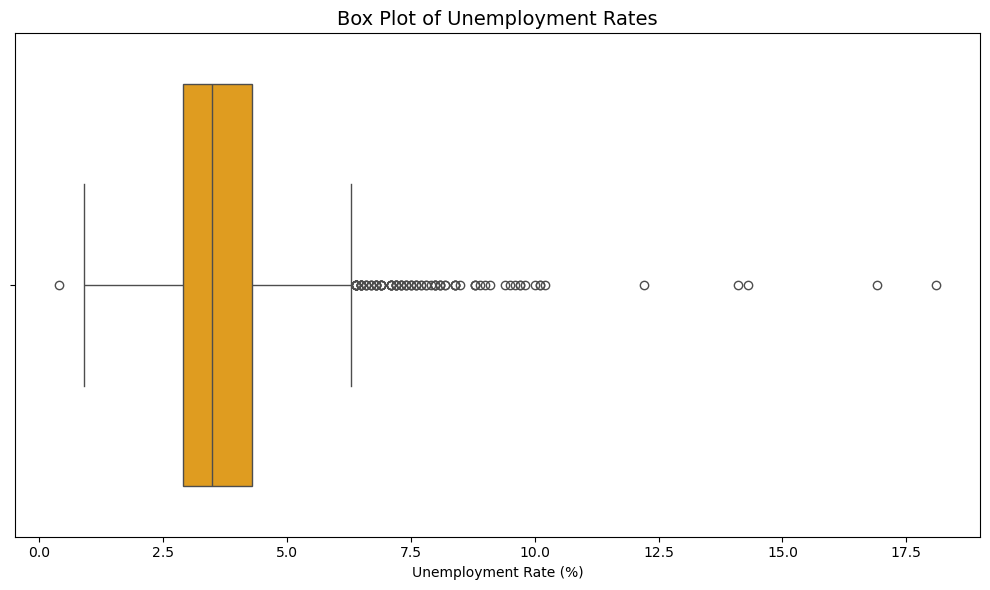

In [28]:
# Box Plot: Detecting Outliers in Unemployment Rates --------
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Unemployment Rate'], color='orange')
plt.title('Box Plot of Unemployment Rates', fontsize=14)
plt.xlabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()

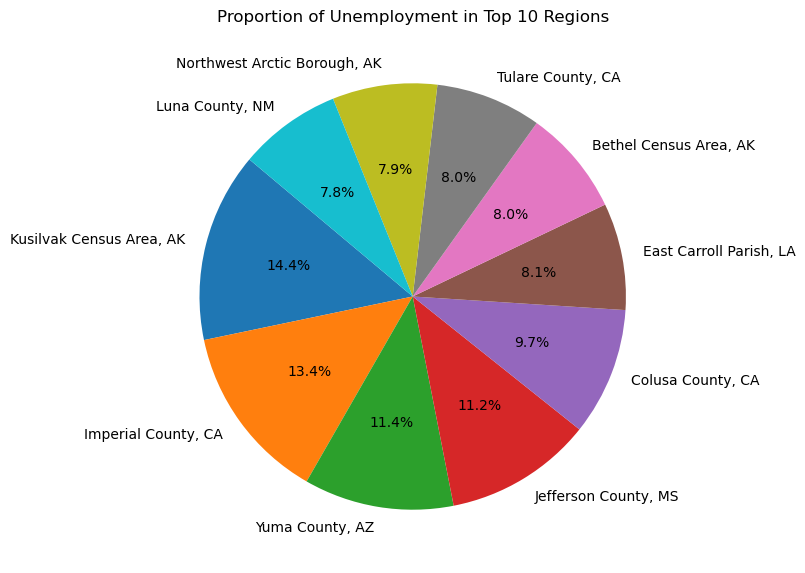

In [32]:
# Pie Chart: Proportion of Unemployment in Top 10 Regions --------
plt.figure(figsize=(8, 8))
plt.pie(top_10['Unemployment Rate'], labels=top_10['Region Name'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Unemployment in Top 10 Regions')
plt.tight_layout()
plt.show()

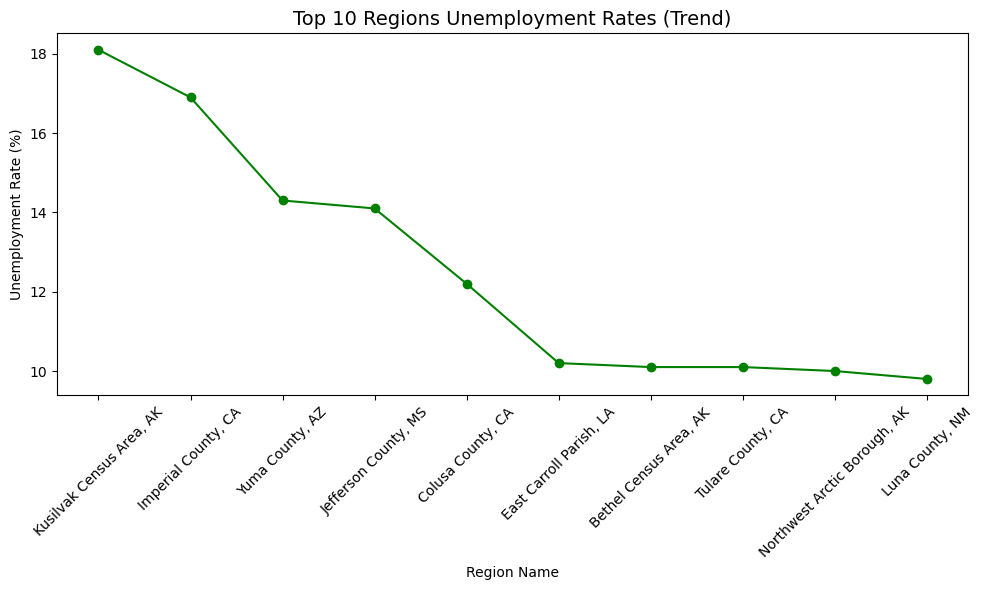

In [34]:
# Line Chart: Top 10 Regions Unemployment Rate (Trend Example) --------
plt.figure(figsize=(10, 6))
plt.plot(top_10['Region Name'], top_10['Unemployment Rate'], marker='o', linestyle='-', color='green')
plt.title('Top 10 Regions Unemployment Rates (Trend)', fontsize=14)
plt.xlabel('Region Name')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\sagar.kumar\AppData\Local\Temp\ipykernel_19168\3687007388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region Code', y='Unemployment Rate', data=grouped.head(20), palette='magma')


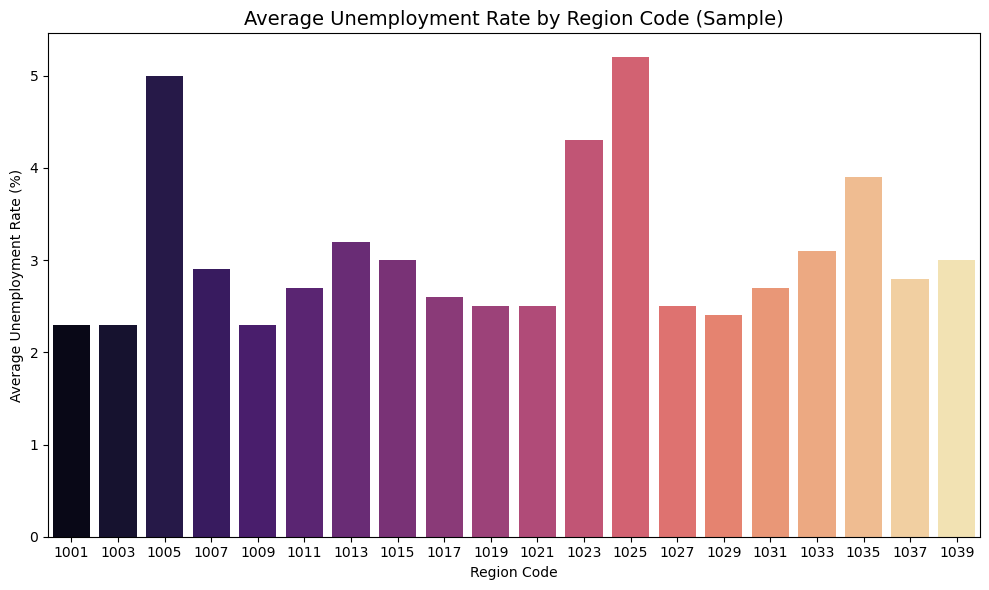

In [36]:
#  Average Unemployment Rate by Region Code --------
grouped = data.groupby('Region Code')['Unemployment Rate'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region Code', y='Unemployment Rate', data=grouped.head(20), palette='magma')
plt.title('Average Unemployment Rate by Region Code (Sample)', fontsize=14)
plt.xlabel('Region Code')
plt.ylabel('Average Unemployment Rate (%)')
plt.tight_layout()
plt.show()

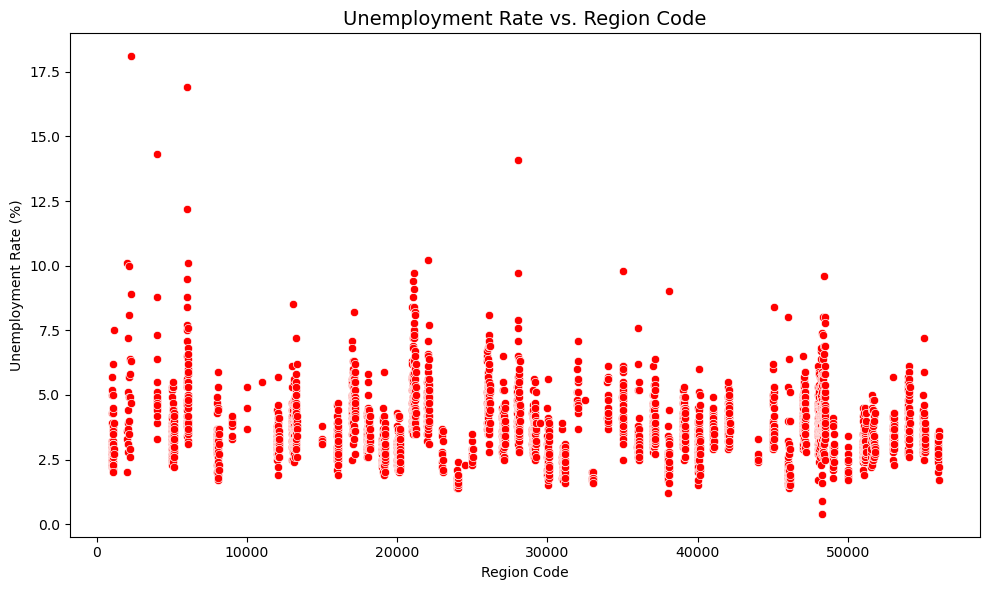

In [40]:
# Scatter Plot: Unemployment Rate vs. Region Code --------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Region Code', y='Unemployment Rate', data=data, color='red')
plt.title('Unemployment Rate vs. Region Code', fontsize=14)
plt.xlabel('Region Code')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()

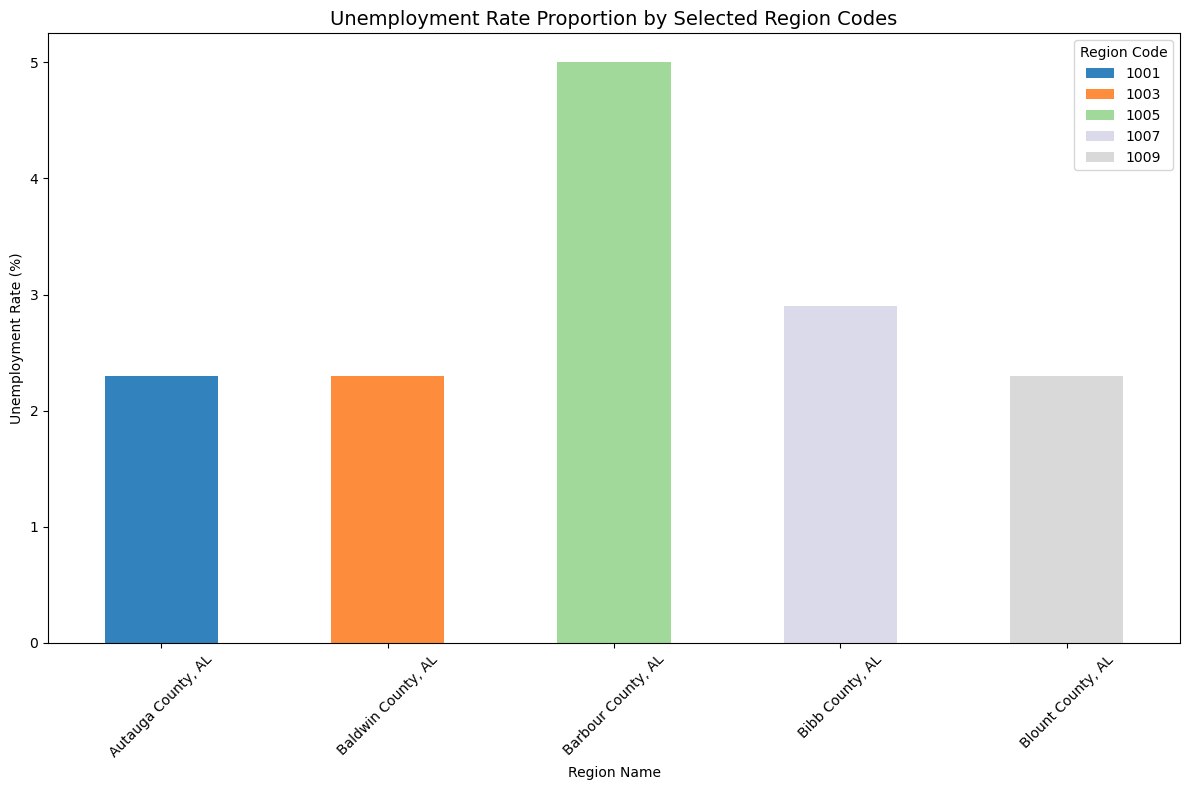

In [50]:
# Select a few region codes to highlight (e.g., first 5 unique region codes)
selected_region_codes = data['Region Code'].unique()[:5]
selected_data = data[data['Region Code'].isin(selected_region_codes)]

# Create pivot table for stacking
pivot_data = selected_data.pivot_table(index='Region Name', columns='Region Code', values='Unemployment Rate').fillna(0)

# Plot stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20c')
plt.title('Unemployment Rate Proportion by Selected Region Codes', fontsize=14)
plt.xlabel('Region Name')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()